# Building The CNN And Learning Almost Everything About It

#### 1. Why CNN and Not MLP For Images?
#### 2. How CNN Works? - Layers: Convolutional, Pooling, and Fully Connected Layers
#### 3. Implementing Conv2d From Scratch
#### 4. Putting It All Together With PyTorch

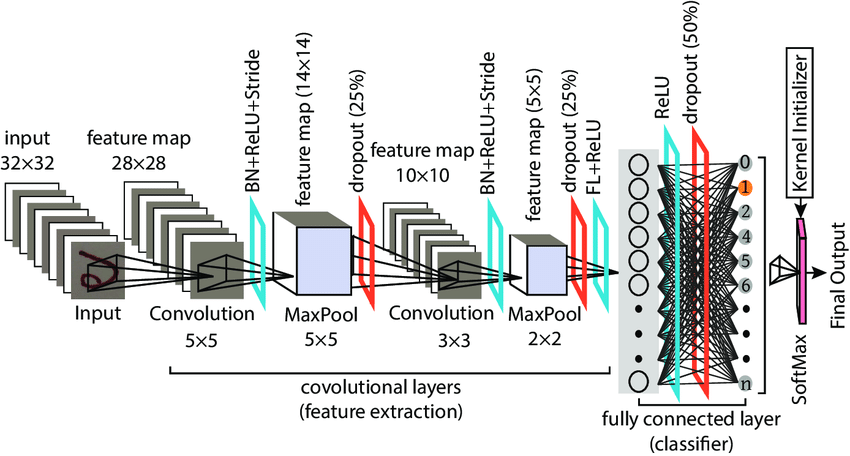


---

### 1. Why We Use The CNN And Not MLP For Images?

CNNs handle image datasets better than MLPs for two main reasons: **Sparse Connectivity** and **Parameter Sharing**.

**Sparse Connectivity:** 
Sparse connectivity means that each neuron in a convolutional layer of a CNN is only connected to a small, localized region of the input image, not to an entire image. This localized region is known as the receptive field.

**Local Receptive Fields:** 
In CNNs, each convolutional kernel operates over a small patch of the input image. This means that neurons in the convolutional layer only focus on small regions of the input, making the network more efficient by reducing the number of parameters and computations.

**Parameter Sharing:** 
The same convolutional filter is applied to the entire input image. This parameter sharing allows CNNs to capture features like edges, textures, and patterns regardless of their position in the image.

---

### Why Not MLP?

**High Number of Parameters:** 
For an image of size 32x32 with 3 color channels, a single neuron in the first hidden layer of an MLP would have \(32 \times 32 \times 3 = 3072\) connections. With a large number of neurons, this quickly becomes impractical.

**Lack of Locality:** 
MLPs treat all input pixels equally without considering the spatial structure of the image. This lack of locality makes it harder for MLPs to capture local patterns and structures that are important for image recognition tasks.


### 2. How CNN Works?

#### Layers: Convolutional, Pooling, and Fully Connected Layers

The CNN model primarily consists of a stack of layers: convolutional and pooling layers, followed by fully connected layers (MLP). Depending on the specific problem, the output layer is generally either sigmoid or softmax.

---

#### Step 1: Convolutional Layer 

*(In the original convolution formula, the filter \( W \) (parameters) is rotated. However, in libraries like PyTorch, \( W \) is used as is. This operation is technically called "cross-correlation.")*

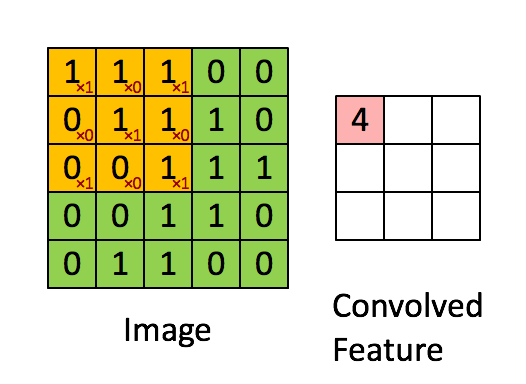

The image first passes through the convolutional layer, which uses a kernel (filled with weights) that slides over the entire image, as shown above. This process extracts features such as edges, textures, and patterns. Modern CNNs usually use kernel sizes such as 1×1, 3×3, or 5×5.

##### 2D Convolution Formula:

The 2D convolution formula can be expressed as:

$$
Y = X * W \implies Y[i, j] = \sum_m \sum_n X[i - m, j - n] W[m, n]
$$

where:
- \( X \) is the input image matrix.
- \( W \) is the kernel (filter) matrix.
- \( Y \) is the output matrix.
- \( i \) and \( j \) are the indices of the output matrix.
- \( m \) and \( n \) are the indices of the kernel matrix.

---

#### Step 2: Pooling Layer

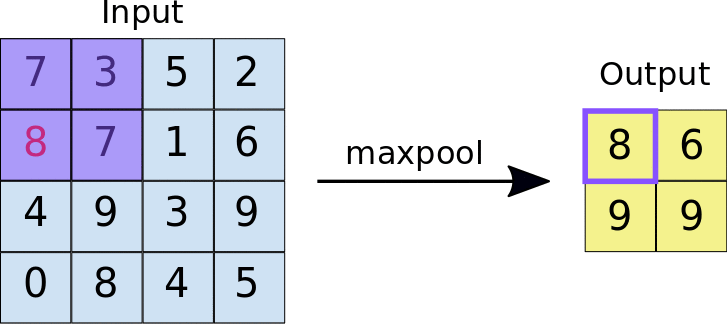

After the convolutional layer, the output is passed to the pooling layer. Pooling reduces the spatial dimensions of the feature maps, which helps decrease the computational load and the number of parameters in the network. It also makes the network invariant to small translations of the input image. 

There are two common types of pooling:
- **MaxPooling**, which selects the maximum value from each patch of the feature map.
- **AveragePooling**, which computes the average value of each patch.

This layer helps summarize the presence of features in patches of the feature map, rather than their precise location.

---

#### Step 3: Fully Connected Layer

The output from the stack of convolutional and pooling layers is then flattened into a one-dimensional vector and passed to the fully connected layer (MLP). This layer performs high-level reasoning by combining all the features detected in previous layers. Each neuron in a fully connected layer is connected to every neuron in the previous layer, allowing the network to learn complex representations and relationships between features.

---

#### Step 4: Output Layer

Finally, the output from the fully connected layer is passed to the output layer. The type of output layer depends on the nature of the problem. For a binary classification problem, a sigmoid activation function is often used, which outputs a probability between 0 and 1. For multiclass classification problems, a softmax activation function is typically used, which outputs a probability distribution over all classes, allowing the network to predict the class with the highest probability.

---

This layered approach allows CNNs to effectively process and classify images by learning and focusing on important features.


### 3. Implementing Convo2d From Scratch 

In [35]:
import numpy as np

def conv2d(input, kernel, padding=0,stride=1):
    # Extracting dimensions of the input and kernel
    input_height, input_width = input.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate output dimensions
    output_height = (input_height - kernel_height + 2 * padding // stride) + 1
    output_width = (input_width - kernel_width + 2 * padding // stride) + 1

    # Apply padding to the input if needed
    if padding > 0:
        padded_input = np.zeros((input_height + 2 * padding, input_width + 2 * padding)) #adding from the both side 
        # print(padded_input) 
        padded_input[padding:padding + input_height, padding:padding + input_width] = input #adding to the input 
    else:
        padded_input = input

    # Initialize the output
    output = np.zeros((output_height, output_width))

    # Perform the convolution operation
    for y in range(output_height):
        for x in range(output_width):
            region = padded_input[y:y + kernel_height, x:x + kernel_width]
            output[y, x] = np.sum(region * kernel)

    return output

# Example usage
input_matrix = np.array([
    [1, 2, 3, 0, 0],
    [4, 5, 6, 0, 0],
    [7, 8, 9, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])

kernel_matrix = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

output_matrix = conv2d(input_matrix, kernel_matrix, padding=1,stride = 1)
print("our_conv2d: ")
print(output_matrix)

#---------------------------------------PyTorch----------------------------------------#

import torch
import torch.nn as nn

# Define the input and kernel
input_tensor = torch.tensor(input_matrix, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  
kernel_tensor = torch.tensor(kernel_matrix, dtype=torch.float32).unsqueeze(0).unsqueeze(0) 

# Define the conv2d operation in PyTorch
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, stride=1, bias=False)
conv.weight.data = kernel_tensor

# Perform the convolution
output_tensor = conv(input_tensor)
output_pytorch = output_tensor.squeeze().detach().numpy()

print("PyTorch conv2d output:")
print(output_pytorch)



our_conv2d: 
[[ -7.  -4.   7.   9.   0.]
 [-15.  -6.  15.  18.   0.]
 [-13.  -4.  13.  15.   0.]
 [ -8.  -2.   8.   9.   0.]
 [  0.   0.   0.   0.   0.]]
PyTorch conv2d output:
[[ -7.  -4.   7.   9.   0.]
 [-15.  -6.  15.  18.   0.]
 [-13.  -4.  13.  15.   0.]
 [ -8.  -2.   8.   9.   0.]
 [  0.   0.   0.   0.   0.]]


### 4. Putting It All Together With PyTorch 

In [1]:
#import 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import Javascript  # Restrict height of output cell.
from sklearn.metrics import ConfusionMatrixDisplay

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils import data
import torch.nn as nn
import torch.nn.functional as F


In [2]:
#lets get the data 

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.gelu(self.fc1(x))  # using gelu instead of gelu (idk why)
        x = F.gelu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

[1,  2000] loss: 1.815
[1,  4000] loss: 1.537
[1,  6000] loss: 1.447
[1,  8000] loss: 1.410
[1, 10000] loss: 1.375
[1, 12000] loss: 1.324
[2,  2000] loss: 1.237
[2,  4000] loss: 1.240
[2,  6000] loss: 1.240
[2,  8000] loss: 1.226
[2, 10000] loss: 1.219
[2, 12000] loss: 1.193


## Lenet 